<a href="https://colab.research.google.com/github/VDeshmukhCemtrex/Machine-Learning-Algorithms/blob/main/Principle_Component_Analysis(PCA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
np.random.seed(20)

In [3]:
vec1=np.array([0,0,0])
mat1=np.array([[1,0,0],[0,1,0],[0,0,1]])
c1s=np.random.multivariate_normal(vec1,mat1,20)

In [4]:
df = pd.DataFrame(c1s,columns=['feature1','feature2','feature3'])
df['target'] = 1

In [5]:
vec2=np.array([1,1,1])
mat2=np.array([[1,0,0],[0,1,0],[0,0,1]])
c2s=np.random.multivariate_normal(vec2,mat2,20)

In [7]:
df1 = pd.DataFrame(c2s,columns=['feature1','feature2','feature3'])
df1['target'] = 0

In [8]:
df = df.append(df1,ignore_index=True)
df = df.sample(40)
df

feature1  feature2  feature3  target
17 -2.704365 -0.555186  0.001509       1
39  1.831106  0.634943  1.496770       0
28  0.590429  2.447407  0.595466       0
16  1.204511  1.351796  0.493437       1
2   0.939469 -0.978481  0.503097       1
34  1.218658  0.607118  0.771303       0
19  1.503398 -1.482385 -0.856164       1
38  1.752313 -0.334921  1.676640       0
37  1.934591  0.288214  2.443083       0
14 -0.602308  1.544728  0.647034       1
33  1.857999  0.467921  2.125759       0
13 -1.136527 -0.338491  0.320971       1
23 -0.485720  1.098789  0.771679       0
26  1.646430  1.487403  1.038192       0
20  0.171307  1.114048  1.527728       0
32 -0.056169  1.554275  0.049982       0
3   0.406414  0.323461 -0.493411       1
24  0.145225  0.486855  0.037784       0
9   1.556186  0.128778 -2.066949       1
12  0.527070 -1.551101  0.329613       1
7  -3.189703  1.120132  1.332778       1
36 -0.961892 -0.852038  2.091887       0
25  0.517549  0.760530  1.459744       0
30  2.095433  0.666456 -0.441849       0
27  1.989487  1.143623  1.750298       0
22  3.094665  1.359429  1.691002       0
29  2.148925  0.061090 -0.901464       0
31 -0.416667 -0.629502 -0.815256       0
8  -0.243339 -0.130031 -0.109017       1
15  0.593217  0.438024  1.357789       1
35 -0.576255  1.165833  1.788797       0
11  2.059838 -0.934938 -1.612990       1
0   0.883893  0.195865  0.357537       1
10 -0.885493 -1.104579  0.932866       1
18  0.857094  1.481144 -0.219661       1
4  -0.792017 -0.842368 -1.279503       1
6   1.051109  0.406368 -0.168646       1
5   0.245715 -0.044195  1.567633       1
21  1.155838  2.301429  0.005198       0
1  -2.343262 -1.084833  0.559696       1

In [11]:
import plotly.express as px
fig = px.scatter_3d(df, x=df['feature1'], y=df['feature2'], z=df['feature3'],color=df['target'].astype('str'))
fig.update_traces(marker=dict(size=9,line=dict(width=2,color='DarkSlateGrey')),selector=dict(mode='markers'))
fig.show()

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df.iloc[:,0:3] = scaler.fit_transform(df.iloc[:,0:3])
covariance_matrix = np.cov([df.iloc[:,0],df.iloc[:,1],df.iloc[:,2]])
print('Covariance Matrix:\n', covariance_matrix)

Covariance Matrix:
 [[ 1.02564103  0.20213544 -0.01339227]
 [ 0.20213544  1.02564103  0.26596897]
 [-0.01339227  0.26596897  1.02564103]]


In [13]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [14]:
eigen_values

array([0.68504534, 1.03854282, 1.35333492])

In [15]:
eigen_vectors

array([[ 0.43773393, -0.79636897,  0.41735533],
       [-0.70020894, -0.01076545,  0.71385681],
       [ 0.56400039,  0.60471528,  0.56233708]])

In [16]:
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch

Populating the interactive namespace from numpy and matplotlib


In [17]:
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

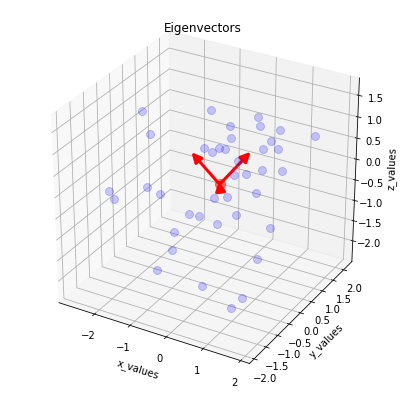

In [18]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(df['feature1'], df['feature2'], df['feature3'], 'o', markersize=8, color='blue', alpha=0.2)
ax.plot([df['feature1'].mean()], [df['feature2'].mean()], [df['feature3'].mean()], 'o', markersize=10, color='red', alpha=0.5)
for v in eigen_vectors.T:
    a = Arrow3D([df['feature1'].mean(), v[0]], [df['feature2'].mean(), v[1]], [df['feature3'].mean(), v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')
plt.title('Eigenvectors')
plt.show()

In [19]:
pc = eigen_vectors[0:2]
pc

array([[ 0.43773393, -0.79636897,  0.41735533],
       [-0.70020894, -0.01076545,  0.71385681]])

In [20]:
transformed_df = np.dot(df.iloc[:,0:3],pc.T)
new_df = pd.DataFrame(transformed_df,columns=['PC1','PC2'])
new_df['target'] = df['target'].values
new_df.head()

PC1       PC2  target
0 -0.504983  1.292090       1
1  0.580449 -0.030650       0
2 -1.615367 -0.022749       0
3 -0.585578 -0.392946       1
4  1.192451 -0.226046       1

In [21]:
new_df['target'] = new_df['target'].astype('str')
fig = px.scatter(x=new_df['PC1'],
                 y=new_df['PC2'],
                 color=new_df['target'],
                 color_discrete_sequence=px.colors.qualitative.G10
                )

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()

# Using Sklearn

In [27]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [33]:
X_train.shape

(56000, 784)

In [34]:
X_test.shape

(14000, 784)

In [35]:
from sklearn.neighbors import KNeighborsClassifier

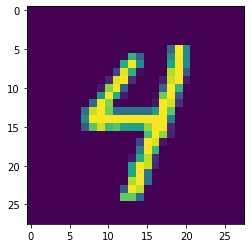

In [37]:
plt.imshow(X_train.iloc[1305].values.reshape(28,28))

In [38]:
knn = KNeighborsClassifier()

In [39]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [40]:
y_pred = knn.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9700714285714286

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [43]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
from sklearn.decomposition import PCA
pca = PCA(n_components=200)

In [45]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [46]:
X_train_trf.shape

(56000, 200)

In [47]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [48]:
y_pred = knn.predict(X_test)

In [49]:
accuracy_score(y_test,y_pred)

0.9457857142857143

In [50]:
for i in range(1,785):
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)
    print('X_train=',X_train_trf.shape)
    knn = KNeighborsClassifier()
    knn.fit(X_train_trf,y_train)
    y_pred = knn.predict(X_test_trf)   
    print('Score=',accuracy_score(y_test,y_pred))

X_train= (56000, 1)
Score= 0.25492857142857145
X_train= (56000, 2)
Score= 0.3212857142857143
X_train= (56000, 3)
Score= 0.511
X_train= (56000, 4)
Score= 0.6701428571428572
X_train= (56000, 5)
Score= 0.7388571428571429
X_train= (56000, 6)
Score= 0.8267857142857142
X_train= (56000, 7)
Score= 0.8443571428571428
X_train= (56000, 8)
Score= 0.8766428571428572
X_train= (56000, 9)
Score= 0.8906428571428572
X_train= (56000, 10)
Score= 0.9115
X_train= (56000, 11)
Score= 0.9191428571428572
X_train= (56000, 12)
Score= 0.9241428571428572
X_train= (56000, 13)
Score= 0.9315714285714286
X_train= (56000, 14)
Score= 0.937
X_train= (56000, 15)
Score= 0.9412142857142857
X_train= (56000, 16)
Score= 0.9430714285714286
X_train= (56000, 17)
Score= 0.9447142857142857
X_train= (56000, 18)
Score= 0.9455
X_train= (56000, 19)
Score= 0.9482142857142857
X_train= (56000, 20)
Score= 0.9480714285714286
X_train= (56000, 21)
Score= 0.9496428571428571
X_train= (56000, 22)
Score= 0.9505
X_train= (56000, 23)
Score= 0.950785

KeyboardInterrupt: ignored

In [51]:
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0],y=X_train_trf[:,1],color=y_train_trf,color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

In [56]:
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)
X_train_trf.shape

(56000, 3)

In [63]:
X_train_trf[:,2].shape

(56000,)

In [64]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(X_train, x=X_train_trf[:,0], y=X_train_trf[:,1], z=X_train_trf[:,2],
              color=y_train_trf)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [67]:
print('explained_variance =',pca.explained_variance_)
print('components_.shape =',pca.components_.shape)
print('explained_variance_ratio =',pca.explained_variance_ratio_)

explained_variance = [40.6329685  29.01311278 26.91849464]
components_.shape = (3, 784)
explained_variance_ratio = [0.05674894 0.04052038 0.03759499]


In [68]:
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [70]:
print('explained_variance =',pca.explained_variance_)
print('components_.shape =',pca.components_.shape)
print('cumsum.explained_variance_ratio =',np.cumsum(pca.explained_variance_ratio_))

explained_variance = [4.06329685e+01 2.90131130e+01 2.69184954e+01 2.08204608e+01
 1.81047848e+01 1.57326502e+01 1.37110164e+01 1.25767117e+01
 1.09673422e+01 9.98327406e+00 9.64372760e+00 8.66448165e+00
 8.02352594e+00 7.86992108e+00 7.38586112e+00 7.14236306e+00
 6.71482726e+00 6.60258730e+00 6.39395015e+00 6.18539372e+00
 5.88793733e+00 5.73425833e+00 5.49363001e+00 5.33345357e+00
 5.13514538e+00 4.95219620e+00 4.86142617e+00 4.72608121e+00
 4.52575460e+00 4.38120182e+00 4.30904070e+00 4.22509567e+00
 4.06353019e+00 4.00356114e+00 3.97287235e+00 3.84791796e+00
 3.76694887e+00 3.72516569e+00 3.67092606e+00 3.46663279e+00
 3.42539134e+00 3.35279266e+00 3.28098453e+00 3.25424477e+00
 3.20398211e+00 3.15037877e+00 3.13650937e+00 3.08985897e+00
 3.04834302e+00 2.99534450e+00 2.94679394e+00 2.88416279e+00
 2.86139985e+00 2.82899038e+00 2.79148406e+00 2.68463820e+00
 2.66028993e+00 2.64984764e+00 2.59646243e+00 2.57028134e+00
 2.52913684e+00 2.49788976e+00 2.46434048e+00 2.45438338e+00
 2.

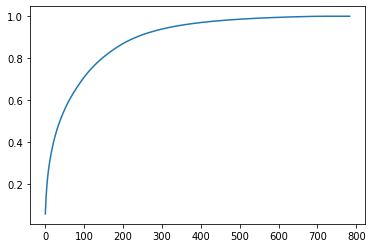

In [71]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))